In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Création du graphe #

### 1.1. Liste des arrêtes ###

In [7]:
### Paramètres : p est une distribution "jouet" pour éviter les éléments nuls dans le calcul de l'entropie croisée

N = 10 # nombre d'individus
max_fr = 5 # nombre maximum de voisins par individu
p = np.array([0.2, 0.3, 0.1, 0.2, 0.2]) # probabilité d'avoir i amis, 0 <= i <= max_fr-1

In [8]:
### Simulation du nombre de voisins par individu

verts = np.random.choice(max_fr, N, p=p)
print(verts)

[1 1 0 3 1 4 1 4 1 4]


In [9]:
### Création de la liste des associations
# Entrée : nombre de voisins par individu
# Sorite : liste des associations sans les boucles et multiples affectations

def assoc(ver):
    # Création d'une liste intermédiaire où le nombre d'occurrences de l'individu i est son nombre de voisins
    neigh = np.array([])
    for i in range(len(ver)):
        for j in range(ver[i]):
            neigh = np.append(neigh, i)
    
    # Simulation de la liste des associations selon la méthode décrite dans l'article
    assoc = np.array([])
    while (len(neigh) > 1): # on vide la liste au maximum (reste 1 élément si longueur impaire)
        i = np.random.randint(len(neigh)) # on choisit au hasard 2 éléments
        a = neigh[i]
        neigh = np.delete(neigh, i) # qu'on enlève de la liste
        j = np.random.randint(len(neigh)) # on choisit au hasard 2 éléments
        b = neigh[j]
        neigh = np.delete(neigh, j) # qu'on enlève de la liste
        if a != b: # on n'inscrit pas l'association si c'est une boucle directe
            assoc = np.append(assoc, np.array([a, b]), axis=0)
    
    assoc = np.reshape(assoc, (-1, 2))
    assoc = np.sort(assoc) # petit tri
    assoc = [tuple(row) for row in assoc]
    assoc = np.unique(assoc, axis=0) # on vire les multiples
    
    return(assoc)

In [10]:
asso = assoc(verts)
print(asso)

[[0. 9.]
 [1. 5.]
 [3. 4.]
 [3. 7.]
 [3. 9.]
 [5. 9.]
 [6. 8.]
 [7. 9.]]


In [11]:
### Création de la liste des voisins
# Entrée : associations sans boucle et multiples
# Sortie : liste des voisins pour chaque individu

def neigh(asso, N=10):
    
    
    neig = []

    for i in range(N):
        n_i = np.array([])
    
        for j in range(len(asso)): # on parcourt les duos
        
            if asso[j][0] == i: # on vérifie si l'individu est dans un duo, si oui on garde son partenaire
                n_i = np.append(n_i, asso[j][1])
            elif asso[j][1] == i: 
                n_i = np.append(n_i, asso[j][0])
        
        n_i = list(n_i)
        neig.append(n_i)
    return(np.array(neig))

In [12]:
neighs = neigh(asso)
print(neighs)

[list([9.0]) list([5.0]) list([]) list([4.0, 7.0, 9.0]) list([3.0])
 list([1.0, 9.0]) list([8.0]) list([3.0, 9.0]) list([6.0])
 list([0.0, 3.0, 5.0, 7.0])]


### 1.2. Comparaison des probabilités ###

In [13]:
### Calcul du nombre de voisins effectif après associations

def N_vois(asso):
    N_vois = np.array([])
    for i in range(N):
        N_vois = np.append(N_vois, (asso == i).sum())
    return(N_vois)

In [14]:
neig = N_vois(asso)
print(neig)

[1. 1. 0. 3. 1. 2. 1. 2. 1. 4.]


In [15]:
### Calcul de la probabilité empirique de la distibution des voisins

def empirical_prob(nb_nei):
    q = np.array([])
    for i in range(len(p)):
        q = np.append(q, (nb_nei == i).sum() / len(nb_nei))
    return(q)

In [16]:
emp = empirical_prob(neig)
print(emp)

[0.1 0.5 0.2 0.1 0.1]


In [17]:
### Entropie croisée

def cross_entropy(p, q):
    assert len(p) == len(q)
    ce = 0
    for i in range(len(p)):
        ce -= p[i] * np.log(q[i])
    return(ce)

In [18]:
cross_entropy(p, p)

1.5571130980576458

In [19]:
cross_entropy(p, emp)

1.750439001207821

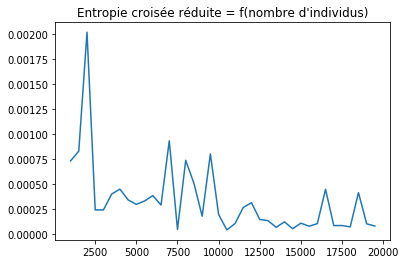

In [20]:
### Entropie croisée entre probabilités théorique et empirique en fonction de la taille de la population minus l'entropie croisée minimale

Ns = np.arange(1000, 20000, 500)
CEs = np.array([])
for N in Ns:
    verts = np.random.choice(max_fr, N, p=p)
    asso = assoc(verts)
    neig = N_vois(asso)
    emp = empirical_prob(neig)
    CEs = np.append(CEs, cross_entropy(p, emp) - cross_entropy(p, p)) # différence entre entropie croisée et entropie croisée minimale

plt.plot(Ns, CEs)
plt.title("Entropie croisée réduite = f(nombre d'individus)")
plt.show()

### 1.3. Poisson et heavy-tail ###

In [21]:
### Distribution des voisins selon la loi de Poisson

def vertsPoiss(N):
    vertsP = np.random.poisson(4, N)
    return(vertsP)

In [22]:
print(vertsPoiss(10))

[0 5 4 5 3 2 3 5 2 1]


In [23]:
### Distribution des voisins selon la loi heavy-tail 

def vertsHT(N):

    probaHT1 = np.array([])
    for i in range(N):  # il ne peut y avoir plus de voisins que d'individus
        probaHT1 = np.append(probaHT1, (i + 1)**-2.5)
        probaHT1 /= probaHT1.sum()

    a = np.random.choice(N, N, p=probaHT1)
    b = np.random.poisson(3.1, N)
    vertsHT = a + b
    return(vertsHT)

In [24]:
print(vertsHT(10))

[2 1 3 2 3 5 1 4 5 5]


# 2. Modèles d'épidémie #

### 2.1. Sans vaccination ###

In [25]:
### Modèle d'épidémie sur graphe sans vaccin
def epi_novac(N, asso, lbd=1, gmm=1):
    
    neig = neigh(asso, N=N)
    
    ### 0 <-> sain, 1 <-> infecté, 2 <-> rémis
    infected = np.zeros(N)
    first_infected = np.random.randint(N) # premier infecté aléatoirement
    infected[first_infected] = 1

    T = 0

    while (infected == 1).sum() > 0:


        # pour chaque individu on calcule tous les temps intéressants
        Ts = np.array([])
        for i in range(len(infected)):

            # s'il est infecté : calcul du temps de rémission et des temps d'infection
            if infected[i] == 1:

                Trem = np.random.exponential(1/gmm) # temps de rémission
                Ts = np.append(Ts, np.array([Trem, i]))

                for nei in neig[i]: 
                    if infected[int(nei)] == 0:
                        Tinf = np.random.exponential(1/lbd) # temps d'infection pour chaque voisin
                        Ts = np.append(Ts, np.array([Tinf, nei]))

        times = Ts[::2]
        pos = Ts[1::2]

        
        Tau, pTau = np.amin(times), np.argmin(times) # on garde le temps minimum

        chosen = int(pos[pTau]) # on change le statut de l'individu associé 
        if infected[chosen] == 0:
            infected[chosen] = 1
        elif infected[chosen] == 1:
            infected[chosen] = 2

        T += Tau

    return(infected)

In [38]:
N = 100

verts = vertsPoiss(N)  
# verts = vertsHT(N)
asso = assoc(verts)

infected = epi_novac(N, asso)

print("Etat final : ", infected)
print("Nombre d'infectés : ", (infected == 2).sum())

Etat final :  [2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 0. 2. 2. 2. 0. 2.
 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 2. 0. 2. 2. 0. 2. 2. 2. 0.
 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]
Nombre d'infectés :  82


### 2.2. Vaccination : modèle 1 ###

In [39]:
def epi_vac1(N, asso, lbd=1, gmm=1, theta=5, rho=0.9):

    neig = neigh(asso, N=N)

    infected = np.zeros(N)
    first_infected = np.random.randint(N)
    infected[first_infected] = 1

    T = 0
    while (infected == 1).sum() > 0:

        # pour chaque individu on calcule tous les temps intéressants
        Ts = np.array([])

        for i in range(len(infected)):

            # s'il est infecté : calcul du temps de rémission, de détection et d'infection
            if infected[i] == 1:
                Trem = np.random.exponential(1/gmm)
                Ts = np.append(Ts, np.array([Trem, i]))

                Tdet = np.random.exponential(1/theta)
                Ts = np.append(Ts, np.array([Tdet, i-N]))

                for nei in neig[i]:
                    if infected[int(nei)] == 0:
                        Tinf = np.random.exponential(1/lbd)
                        Ts = np.append(Ts, np.array([Tinf, nei]))

        times = Ts[::2]
        pos = Ts[1::2]

        Tau, pTau = np.amin(times), np.argmin(times)

        T += Tau

        chosen = int(pos[pTau])
        if chosen < 0:
            chosen += N
            for nei in neig[chosen]:
                if np.random.uniform(0, 1) < rho and infected[int(nei)] == 0:
                    infected[int(nei)] = 3

        else:                           
            if infected[chosen] == 0:
                infected[chosen] = 1           
            elif infected[chosen] == 1:
                infected[chosen] = 2
    
    return(infected)

In [40]:
N = 100
verts = vertsPoiss(N)
# verts = vertsHT(N)
asso = assoc(verts)

infected = epi_vac1(N, asso)

print("Etat final : ", infected)
print("Nombre d'infectés : ", (infected == 2).sum())

Etat final :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.
 0. 0. 0. 0.]
Nombre d'infectés :  1


### 2.3. Vaccination : modèle 2

In [124]:
############### TO DO ########################


def epi_vac2(N, asso, lbd=1, gmm=1, theta=5, m=5):

    neig = neigh(asso, N=N)

    infected = np.zeros(N)
    first_infected = np.random.randint(N)
    infected[first_infected] = 1
    
    n_infec = np.zeros(N)
    
    T = 0
    while (infected == 1).sum() > 0:
        
        assoc_infec = np.array([])
        
        # pour chaque individu on calcule tous les temps intéressants
        Ts = np.array([])

        for i in range(len(infected)):
            
            # s'il est infecté : calcul du temps de rémission, de détection et d'infection
            if infected[i] == 1:
                Trem = np.random.exponential(1/gmm)
                Ts = np.append(Ts, np.array([Trem, i]))
                
                assoc_infec = np.append(assoc_infec, [i, i])

                Tdet = np.random.exponential(1/theta)
                Ts = np.append(Ts, np.array([Tdet, i-N]))
                
                assoc_infec = np.append(assoc_infec, [i, i])
                
                for nei in neig[i]:
                    if infected[int(nei)] == 0:
                        Tinf = np.random.exponential(1/lbd)
                        Ts = np.append(Ts, np.array([Tinf, nei]))
                        assoc_infec = np.append(assoc_infec, np.array([i, nei]))
        
        
        times = Ts[::2]
        pos = Ts[1::2]

        Tau, pTau = np.amin(times), np.argmin(times)

        T += Tau
        
        chosen = int(pos[pTau])
        if chosen < 0:
            chosen += N
            for nei in neig[chosen]:
                if infected[int(nei)] == 0:
                    infected[int(nei)] = 3
        
        else:                           
            if infected[chosen] == 0:
                infected[chosen] = 1
                origin = assoc_infec[2*pTau]
                n_infec[int(origin)] += 1
                                       
            elif infected[chosen] == 1:
                infected[chosen] = 2
        
        for i in range(len(n_infec)):
            if n_infec[i] >= 5:
                for nei in neig[chosen]:
                    if infected[int(nei)] == 0:
                        infected[int(nei)] =3
    
    return(infected)

In [128]:
N = 100
verts = vertsPoiss(N)
# verts = vertsHT(N)
asso = assoc(verts)

infected = epi_vac2(N, asso)

print("Etat final : ", infected)
print("Nombre d'infectés : ", (infected == 2).sum())

Etat final :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 3. 0. 0. 3. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.
 0. 3. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Nombre d'infectés :  1


# 3. Résultats #

### 3.1. Reproduction des résultats de l'article ###

In [130]:
N = 1000
vertsHeavyTail = vertsHT(N)
vertsPoisson = vertsPoiss(N)
assoHT = assoc(vertsHeavyTail)
assoPoiss = assoc(vertsPoisson)

#### 3.1.1. Sans vaccination ####

0
1
2
3
4


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([  1. ,  80.8, 160.6, 240.4, 320.2, 400. , 479.8, 559.6, 639.4,
        719.2, 799. ]),
 <a list of 10 Patch objects>)

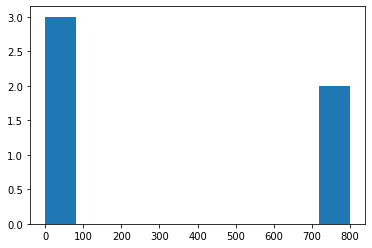

In [100]:
######################### PEUT METTRE DU TEMPS A TOURNER ############################

n_sim = 5
sizes = np.array([])

for i in range(n_sim):
    
    print(i)
    
    infected = epi_novac(N, assoHT)
    sizes = np.append(sizes, (infected == 2).sum())

plt.hist(sizes)

#### 3.1.2. Vaccination 1 ####

0
1
2
3
4


(array([3., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <a list of 10 Patch objects>)

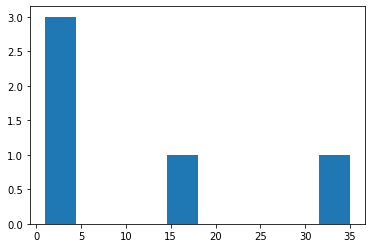

In [150]:
n_sim = 5
sizes = np.array([])

for i in range(n_sim):
    
    print(i)
    
    infected = epi_vac1(N, assoHT)
    sizes = np.append(sizes, (infected == 2).sum())

plt.hist(sizes)

#### 3.1.3. Vaccination 2 ####

0
1
2
3
4


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 3.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

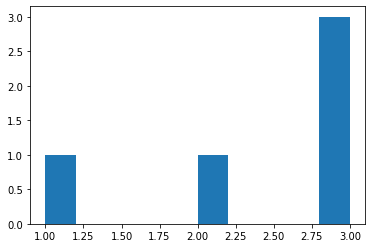

In [131]:
n_sim = 5
sizes = np.array([])

for i in range(n_sim):
    
    print(i)
    
    infected = epi_vac2(N, assoHT)
    sizes = np.append(sizes, (infected == 2).sum())

plt.hist(sizes)